# HIERARCHICAL CLUSTERING

# AGGLOMERATIVE CLUSTERING

In [36]:
from warnings import filterwarnings
filterwarnings('ignore')

In [37]:
import pandas as pd 
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [38]:
df.columns


Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [39]:
df.columns=['CusID', 'Gender', 'Age', 'Income','Spend']
df.head()

,CusID,Gender,Age,Income,Spend
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Seprate X 

In [40]:
X = df[['Age','Income','Spend']]
X.head()

,Age,Income,Spend
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


# Preprocessing Pipeline

In [41]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [42]:
num_pipe = Pipeline(steps=[('impute',SimpleImputer(strategy='median')),
                           ('scaler',StandardScaler())]).set_output(transform='pandas')

In [43]:
X_pre = num_pipe.fit_transform(X)
X_pre.head()

,Age,Income,Spend
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


In [44]:
X_pre.mean()

Age      -1.021405e-16
Income   -2.131628e-16
Spend    -1.465494e-16
dtype: float64

# Calculate optimal number of classifier on basis of SILHUTEE SCORE

In [46]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

In [48]:
n = list(range(2,15))
n

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

In [52]:
scores = []
for i in n:
    model = AgglomerativeClustering(n_clusters=i)
    model.fit(X_pre)

    # predict model clusters 
    c = model.labels_

    #calculate SILHOUTEE Score
    sil = silhouette_score(X_pre,c)
    scores.append(sil)


In [53]:
scores

[0.31795733680759597,
 0.32148866683112387,
 0.3614512741691407,
 0.39002826186267214,
 0.4201169558789579,
 0.3982948069934959,
 0.36647935858620484,
 0.3753854624760521,
 0.3808885873908944,
 0.38119813515480855,
 0.3535716262087456,
 0.35579016289204674,
 0.35322985543969]

# VISUVALIZE the SILHOUTEE SCORES

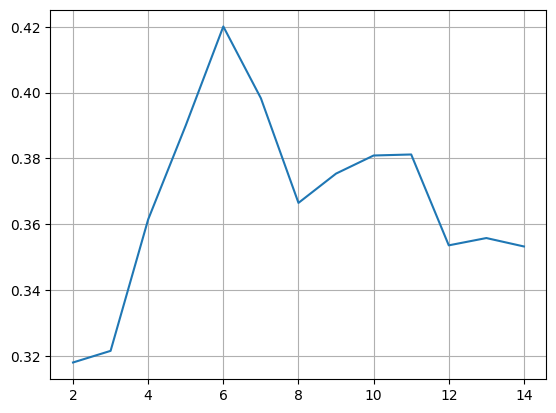

In [57]:
import matplotlib.pyplot as plt
plt.plot(n,scores)
plt.grid()
plt.show()

#Based on above clusters graph of 6 ie 0.42 the highest

# Creat a AGGLOREMATIVE MODEL WITH CLUST = 6

In [59]:
model = AgglomerativeClustering(n_clusters=6)
model.fit(X_pre)

AgglomerativeClustering(n_clusters=6)

In [60]:
model.labels_

array([4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5,
       4, 5, 4, 5, 4, 0, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 1, 5, 4, 0,
       4, 5, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 1, 2, 3, 2, 3, 2,
       0, 2, 0, 2, 3, 2, 0, 2, 3, 2, 0, 2, 0, 2, 1, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 1, 2, 0, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2], dtype=int64)

# Save above results in X 

In [61]:
X['labels']=model.labels_

In [63]:
X

,Age,Income,Spend,labels
0,19,15,39,4
1,21,15,81,5
2,20,16,6,4
3,23,16,77,5
4,31,17,40,4
...,...,...,...,...
195,35,120,79,2
196,45,126,28,3
197,32,126,74,2
198,32,137,18,3


In [65]:
X[X['labels']==1]

,Age,Income,Spend,labels
40,65,38,35,1
46,50,40,55,1
50,49,42,52,1
53,59,43,60,1
54,50,43,45,1
55,47,43,41,1
56,51,44,50,1
57,69,44,46,1
59,53,46,46,1
60,70,46,56,1


In [73]:
for i in range(6):
    print(f'cluster {i}\n')
    display(X[X['labels']==i].head())
    print('\n====================================\n')


cluster 0



,Age,Income,Spend,labels
27,35,28,61,0
43,31,39,61,0
47,27,40,47,0
48,29,40,42,0
49,31,40,42,0




cluster 1



,Age,Income,Spend,labels
40,65,38,35,1
46,50,40,55,1
50,49,42,52,1
53,59,43,60,1
54,50,43,45,1




cluster 2



,Age,Income,Spend,labels
123,39,69,91,2
125,31,70,77,2
127,40,71,95,2
129,38,71,75,2
131,39,71,75,2




cluster 3



,Age,Income,Spend,labels
128,59,71,11,3
130,47,71,9,3
136,44,73,7,3
140,57,75,5,3
148,34,78,22,3




cluster 4



,Age,Income,Spend,labels
0,19,15,39,4
2,20,16,6,4
4,31,17,40,4
6,35,18,6,4
8,64,19,3,4




cluster 5



,Age,Income,Spend,labels
1,21,15,81,5
3,23,16,77,5
5,22,17,76,5
7,23,18,94,5
9,30,19,72,5


# CENTROID

In [74]:
X.groupby('labels').mean()

,Age,Income,Spend
labels,,,
0,27.377778,57.511111,45.844444
1,56.400000,55.288889,48.355556
2,32.692308,86.538462,82.128205
3,43.892857,91.285714,16.678571
4,44.318182,25.772727,20.272727
5,24.809524,25.619048,80.238095


# PLOTTING ABOVE RESULTS

In [75]:
import plotly.express as px

In [82]:
fig = px.scatter_3d(data_frame=X, x= 'Age',y='Income',z='Spend')
fig.show()

# Save X results to csv file

In [83]:
X.to_csv('results.csv',index=False)